# **Applied Artificial Intelligence 2024/25 T3**

002_CWRK:Project Submission

## **Natural Language Processing (NLP) task**

Loading the Dataset

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
# Download the 'stopwords' dataset (common words to filter out)
nltk.download('stopwords')
# Download the 'wordnet' database (used for lemmatization and word relations)
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
# Path to the dataset stored on Google Drive
path = "/content/drive/MyDrive/Dataset/training.1600000.processed.noemoticon (2).csv"
# Load CSV from the given path
# encoding='latin-1' prevents errors when reading special characters
df=pd.read_csv(path, encoding='latin-1')
df

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [5]:
# Header=none prevents pandas from misreading the first row as column names as this csv file has no header row
df = pd.read_csv(path, encoding='latin-1', header=None)
df

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [6]:
# Assigning column names since original has no header
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [8]:
# View unique sentiment values in the target column
df['target'].unique()

array([0, 4])

In [9]:
# Convert 0 (negative) and 4 (positive) to binary 0 and 1 for model simplicity
df['target'] = df['target'].map({0: 0, 4: 1})

### **Cleaning the dataset**

In [10]:
# View unique sentiment values in the 'text' column
df['text'].unique()

array(["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
       "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
       '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
       ..., 'Are you ready for your MoJo Makeover? Ask me for details ',
       'Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur ',
       'happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H '],
      dtype=object)

In [11]:
def clean_tweet(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df['text'].apply(clean_tweet)

In [12]:
df['clean_text'].unique()

array(['a thats a bummer you shoulda got david carr of third day to do it d',
       'is upset that he cant update his facebook by texting it and might cry as a result school today also blah',
       'i dived many times for the ball managed to save the rest go out of bounds',
       ..., 'are you ready for your mojo makeover ask me for details',
       'happy th birthday to my boo of alll time tupac amaru shakur',
       'happy charitytuesday'], dtype=object)

In [13]:
# Define stop words set
stop_words = set(stopwords.words('english'))
# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_for_ml(text):
    words = text.split()
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    # Lemmatize
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Only for ML-based models
df['ml_text'] = df['clean_text'].apply(preprocess_for_ml)

In [14]:
# Randomly display 5 rows showing original, cleaned, and ML-ready text
print(df[['text', 'clean_text', 'ml_text']].sample(5))

                                                      text  \
1235066  @therajman Living the dream man, living the dr...   
101224   Got a Fox outside going mental. Always come sn...   
1562139  @pato_30stm it's 8:15 in the evening here. i'v...   
660732   exams suck exams suck exams suck exams suck ex...   
97849                                     Hate toothache!    

                                                clean_text  \
1235066              living the dream man living the dream   
101224   got a fox outside going mental always come sni...   
1562139  its in the evening here ive been celebrating a...   
660732   exams suck exams suck exams suck exams suck ex...   
97849                                       hate toothache   

                                                   ml_text  
1235066                      living dream man living dream  
101224   got fox outside going mental always come sniff...  
1562139  evening ive celebrating littletoo much lol im ...  
660732   e

## **Visualisations**

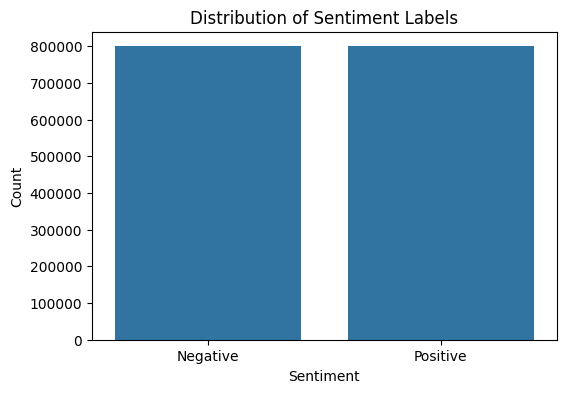

In [15]:
# Set figure size for the plot
plt.figure(figsize=(6, 4))

# Create a count plot of sentiment labels
sns.countplot(x='target', data=df)

# Add plot title and axis labels
plt.title('Distribution of Sentiment Labels')

# Replace numeric x-ticks with label names
plt.xticks([0, 1], ['Negative', 'Positive'])

# Label the axes
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display the plot
plt.show()

/tmp/ipython-input-1994986687.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


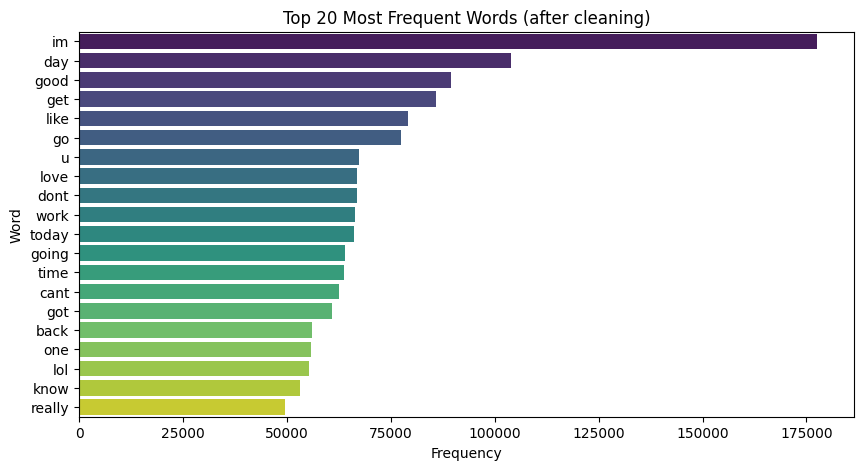

In [63]:
# Join all cleaned text into one large string (for frequency analysis)
all_words = ' '.join(df['ml_text'])

# Count the most common words
word_counts = Counter(all_words.split())
common_words = word_counts.most_common(20)  # Top 20 words

# Separate words and counts for plotting
words, counts = zip(*common_words)

# Create bar plot of top 20 words
plt.figure(figsize=(10, 5))
sns.barplot(x=list(counts), y=list(words), palette='viridis')

# Add title and axis labels
plt.title('Top 20 Most Frequent Words (after cleaning)')
plt.xlabel('Frequency')
plt.ylabel('Word')

# Display the plot
plt.show()

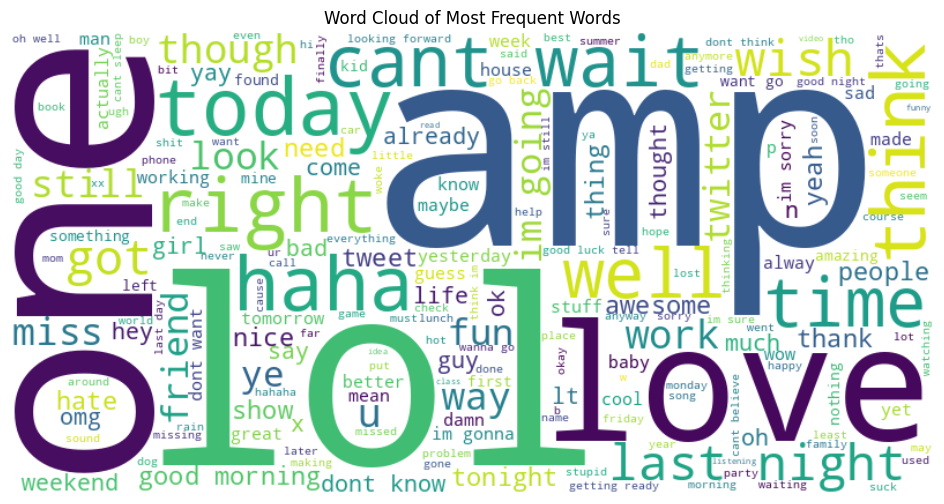

In [64]:
# Generate a word cloud from all cleaned words
wordcloud = WordCloud(
    width=800,              # Width of the word cloud image
    height=400,             # Height of the word cloud image
    background_color='white'  # Background color
).generate(all_words)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')  # Smooth rendering
plt.axis('off')  # Hide axes for cleaner look
plt.title('Word Cloud of Most Frequent Words')
plt.show()

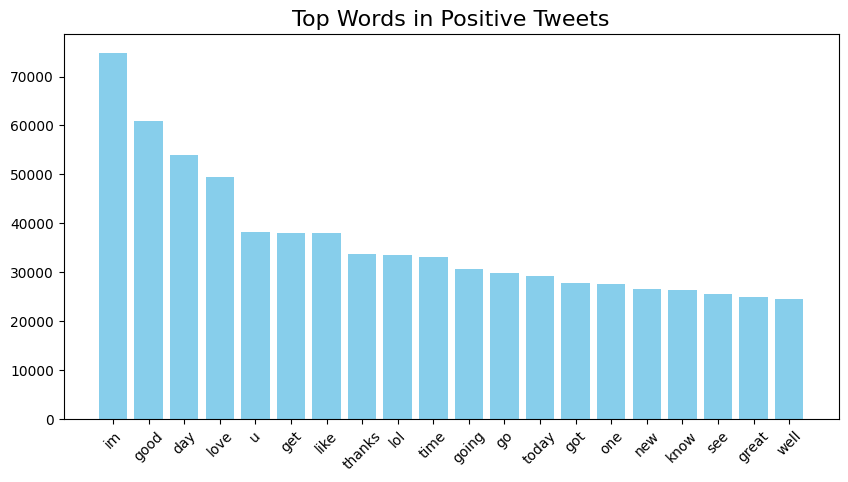

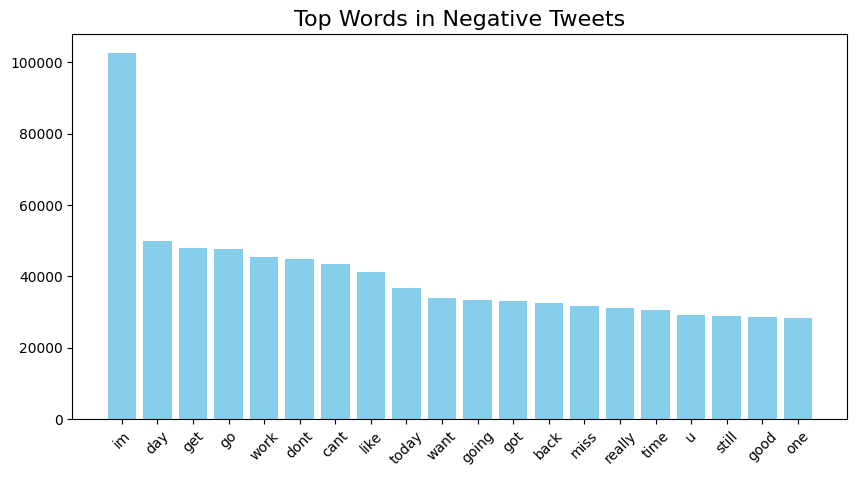

In [23]:
# Separate tweets by sentiment
positive_tweets = " ".join(df[df['target'] == 1]['ml_text'])
negative_tweets = " ".join(df[df['target'] == 0]['ml_text'])

def plot_top_words(text, title, n=20):
    words = text.split()
    counter = Counter(words)
    common_words = counter.most_common(n)
    words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

    plt.figure(figsize=(10,5))
    plt.bar(words_df['Word'], words_df['Frequency'], color='skyblue')
    plt.xticks(rotation=45)
    plt.title(title, fontsize=16)
    plt.show()

plot_top_words(positive_tweets, "Top Words in Positive Tweets")
plot_top_words(negative_tweets, "Top Words in Negative Tweets")

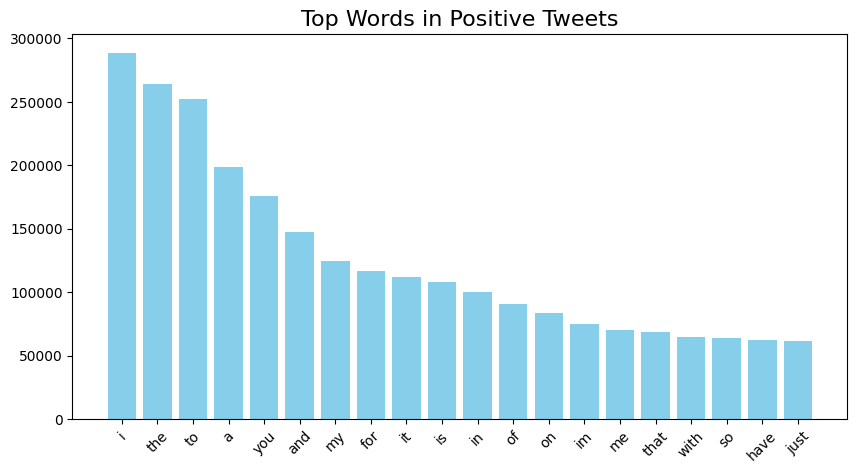

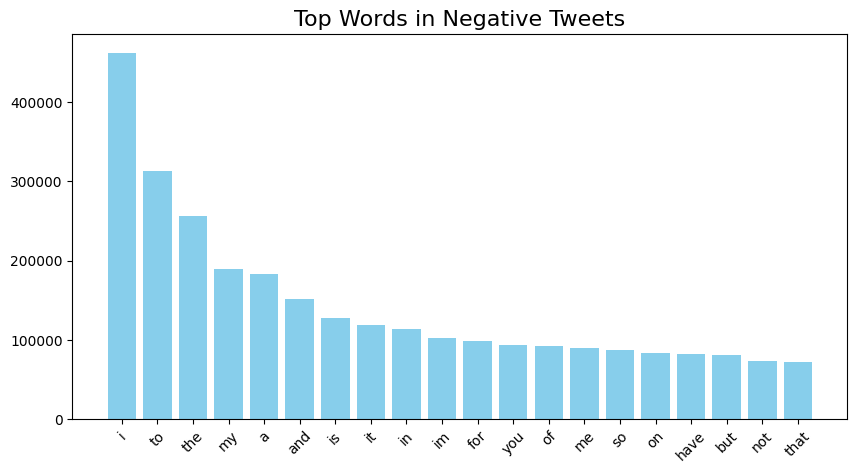

In [69]:
# Separate tweets by sentiment
positive_tweets = " ".join(df[df['target'] == 1]['clean_text'])
negative_tweets = " ".join(df[df['target'] == 0]['clean_text'])

def plot_top_words(text, title, n=20):
    words = text.split()
    counter = Counter(words)
    common_words = counter.most_common(n)
    words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

    plt.figure(figsize=(10,5))
    plt.bar(words_df['Word'], words_df['Frequency'], color='skyblue')
    plt.xticks(rotation=45)
    plt.title(title, fontsize=16)
    plt.show()

plot_top_words(positive_tweets, "Top Words in Positive Tweets")
plot_top_words(negative_tweets, "Top Words in Negative Tweets")


**Train/Test Split**

In [16]:
# Features and labels
X_ml = df['ml_text']         # cleaned for ML models
X_dl = df['clean_text']      # cleaned for Deep Learning models
y = df['target']             # labels

# Split for ML models (80% train, 20% test)
# Stratify=y ensures both train&test sets keep the same class balance
X_train_ml, X_test_ml, y_train, y_test = train_test_split(
    X_ml, y, test_size=0.2, random_state=42, stratify=y
)

# Split for Deep Learning models (same y to keep consistent)
X_train_dl, X_test_dl, _, _ = train_test_split(
    X_dl, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train_ml.shape[0])
print("Testing set size:", X_test_ml.shape[0])

Training set size: 1280000
Testing set size: 320000


## **Traditional methods(Naive Bayes and SVM)**

### **TF-IDF Vectorizer**

In [17]:
# Initialize TF-IDF Vectorizer to convert text into numeric features
# max_features=5000 limits to the top 5000 most frequent n-grams
# ngram_range=(1,2) includes unigrams (single words) and bigrams (pairs of words)
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

# Fit the vectorizer on the training data and transform it into TF-IDF feature vectors
X_train_ml_tfidf = tfidf.fit_transform(X_train_ml)

# Transform the test data using the same vectorizer (no fitting here)
X_test_ml_tfidf = tfidf.transform(X_test_ml)

# Print the shapes of the transformed train and test feature matrices
print("TF-IDF train shape:", X_train_ml_tfidf.shape)
print("TF-IDF test shape:", X_test_ml_tfidf.shape)

TF-IDF train shape: (1280000, 5000)
TF-IDF test shape: (320000, 5000)


## **NB and SVM**

In [38]:
# --- Model 1: Multinomial Naive Bayes ---
nb_model = MultinomialNB()  # Initialize the Naive Bayes classifier
nb_model.fit(X_train_ml_tfidf, y_train)  # Train on TF-IDF features and labels
y_pred_nb = nb_model.predict(X_test_ml_tfidf)  # Predict on test data

# Print accuracy and detailed classification metrics for Naive Bayes
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


# --- Model 2: Linear Support Vector Machine (SVM) ---
svm_model = LinearSVC()  # Initialize Linear SVM classifier
svm_model.fit(X_train_ml_tfidf, y_train)  # Train on TF-IDF features and labels
y_pred_svm = svm_model.predict(X_test_ml_tfidf)  # Predict on test data

# Print accuracy and detailed classification metrics for SVM
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Naive Bayes Accuracy: 0.759678125
              precision    recall  f1-score   support

           0       0.76      0.76      0.76    160000
           1       0.76      0.76      0.76    160000

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000

SVM Accuracy: 0.775915625
              precision    recall  f1-score   support

           0       0.79      0.75      0.77    160000
           1       0.76      0.80      0.78    160000

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



**Confusion Matrix for NB**

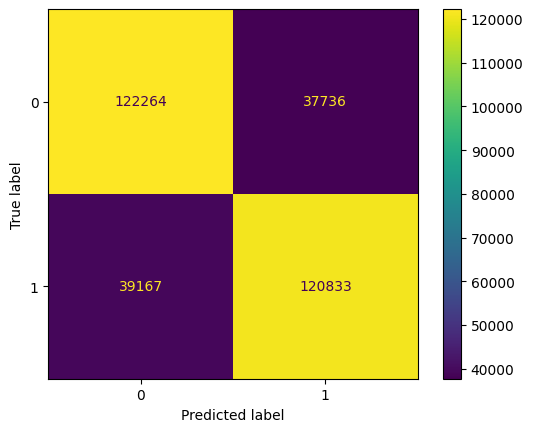

In [46]:
# Compute confusion matrix for Naive Bayes predictions
cm = confusion_matrix(y_test, y_pred_nb)

# Create and plot the confusion matrix visualization
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Show the plot
plt.show()

**Confusion Matrix for SVM**

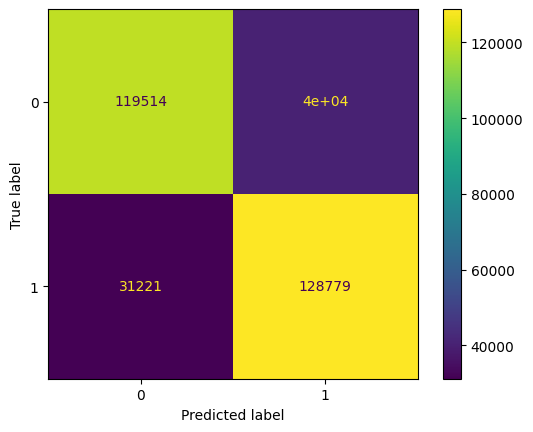

In [65]:
# Compute confusion matrix for SVM predictions
cm = confusion_matrix(y_test, y_pred_svm)

# Create and plot the confusion matrix visualization
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Show the plot
plt.show()

## **Finetuning**

## **Naive Bayes**

In [32]:
# Pipeline: Vectorizer + Model
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=None)), # stopwords already removed in preprocessing
    ('nb', MultinomialNB())
])

# Parameter grid for GridSearchCV
param_grid = {
    'tfidf__ngram_range': [(1,1), (1,2)],       # unigrams, bigrams
    'tfidf__max_features': [5000, 10000, None],       # limit or keep all features
    'nb__alpha': [0.1, 0.5, 1.0]                      # smoothing parameters
}

# GridSearchCV setup
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring='f1_macro',     # macro F1 for balanced class evaluation
    cv=5,                   # 5-fold cross-validation
    verbose=2,
    n_jobs=-1               # use all CPU cores
)

# Fit on training data
grid_search.fit(X_train_ml, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Macro F1 Score (CV):", grid_search.best_score_)

# Evaluate on test set
y_pred = grid_search.best_estimator_.predict(X_test_ml)
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred))

# Store best model for later use
best_nb_model = grid_search.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'nb__alpha': 1.0, 'tfidf__max_features': None, 'tfidf__ngram_range': (1, 2)}
Best Macro F1 Score (CV): 0.7812913405015568

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.77      0.81      0.79    160000
           1       0.80      0.75      0.78    160000

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



## **Confusion Matrix**

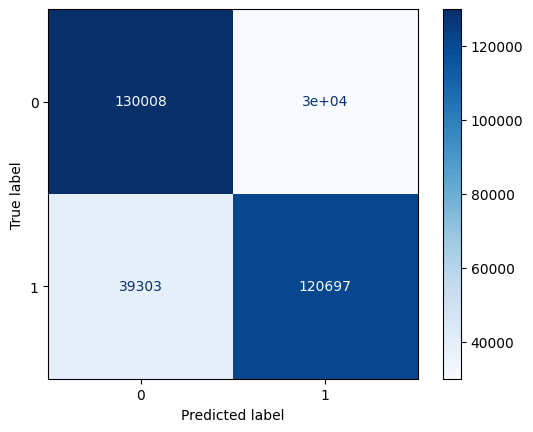

In [47]:
# Predict on the test set
y_pred = best_nb_model.predict(X_test_ml)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

## **SVM**

In [33]:
# --- Pipeline ---
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('svm', LinearSVC())
])

# --- Hyperparameter grid ---
param_grid_svm = {
    'tfidf__ngram_range': [(1,1), (1,2)],  # uni, bi
    'tfidf__max_features': [5000, 10000, None],   # None = all features
    'svm__C': [0.1, 1, 10]                        # regularization strength
}

# --- GridSearchCV ---
grid_search_svm = GridSearchCV(
    svm_pipeline,
    param_grid_svm,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=2
)

# --- Fit on training data ---
grid_search_svm.fit(X_train_ml, y_train)

# --- Evaluate on test data ---
y_pred_svm = grid_search_svm.best_estimator_.predict(X_test_ml)
print("\nBest Parameters:", grid_search_svm.best_params_)
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_svm))

# --- Store best model ---
best_svm_model = grid_search_svm.best_estimator_


Fitting 5 folds for each of 18 candidates, totalling 90 fits

Best Parameters: {'svm__C': 0.1, 'tfidf__max_features': None, 'tfidf__ngram_range': (1, 2)}

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.79      0.77      0.78    160000
           1       0.78      0.80      0.79    160000

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



## **SVM Confusion Matrix**

Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.79      0.77      0.78    160000
           1       0.78      0.80      0.79    160000

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



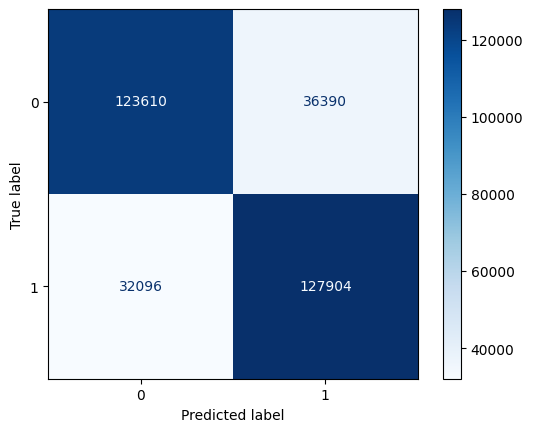

In [48]:
# Predict with best SVM model
y_pred = best_svm_model.predict(X_test_ml)

# Classification report
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svm_model.classes_)
disp.plot(cmap='Blues')

## **Deep Learning Methods**

**Tokenization and Pad Sequence**

In [19]:
# Parameters
max_words = 10000   # Keep only the top 10,000 most frequent words
max_len = 100       # Pad sequences to 100 tokens length

# --- Tokenize ---
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")  # OOV token for out-of-vocabulary words
tokenizer.fit_on_texts(X_train_dl)  # Learn word index from training texts

# Convert texts to sequences of integers (word indices)
X_train_seq = tokenizer.texts_to_sequences(X_train_dl)
X_test_seq = tokenizer.texts_to_sequences(X_test_dl)

# --- Pad sequences ---
# Pad sequences to max_len; shorter sequences get zeros appended (post-padding),
# longer ones truncated from the end (post-truncating)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

print("Tokenized & padded shape:", X_train_pad.shape, X_test_pad.shape)

Tokenized & padded shape: (1280000, 100) (320000, 100)


## **LSTM Model**

In [23]:
# --- Fine-tuned hyperparameters ---
embedding_dim = 128         # Size of embedding vectors for each word
lstm_units = 64             # Number of LSTM units
dropout_rate = 0.3          # Dropout to reduce overfitting within LSTM
learning_rate = 0.0003      # Small learning rate for smoother convergence
batch_size = 64             # Number of samples per gradient update
epochs = 10                 # Max epochs for training

# --- LSTM Model Architecture ---
lstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim),
    # Embedding layer turns integer sequences into dense vectors
    LSTM(lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate),
    # LSTM layer with dropout on inputs and recurrent connections
    Dense(64, activation='relu'),  # Fully connected layer with ReLU activation
    Dropout(0.5),                  # Dropout for regularization after dense layer
    Dense(1, activation='sigmoid') # Output layer for binary classification (0 or 1)
])

# --- Compile the model with Adam optimizer and binary cross-entropy loss ---
optimizer = Adam(learning_rate=learning_rate)
lstm_model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

# Print model summary to check architecture and parameter counts
lstm_model.summary()

# --- Callbacks ---
early_stop = EarlyStopping(
    monitor='val_loss',     # Watch validation loss
    patience=3,             # Stop if no improvement for 3 consecutive epochs
    restore_best_weights=True  # Restore best model weights after stopping
)

# --- Train the model ---
history_lstm = lstm_model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stop],  # Enable early stopping
    verbose=1                # Show training progress
)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 3252s 162ms/step - accuracy: 0.5006 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 3286s 164ms/step - accuracy: 0.4994 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 3327s 166ms/step - accuracy: 0.4995 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 3423s 171ms/step - accuracy: 0.4997 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 3438s 172ms/step - accuracy: 0.4994 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


10000/10000 ━━━━━━━━━━━━━━━━━━━━ 534s 53ms/step


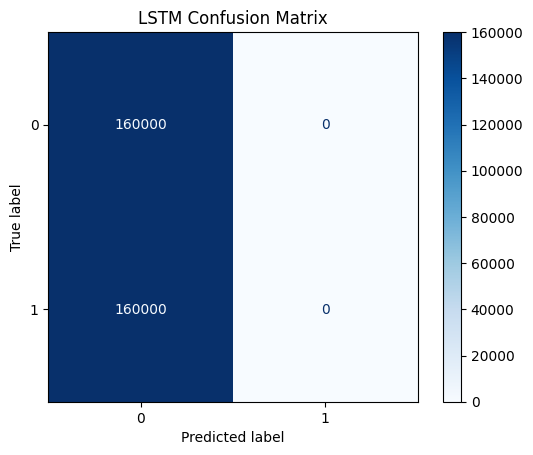

LSTM Classification Report:

              precision    recall  f1-score   support

           0       0.50      1.00      0.67    160000
           1       0.00      0.00      0.00    160000

    accuracy                           0.50    320000
   macro avg       0.25      0.50      0.33    320000
weighted avg       0.25      0.50      0.33    320000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


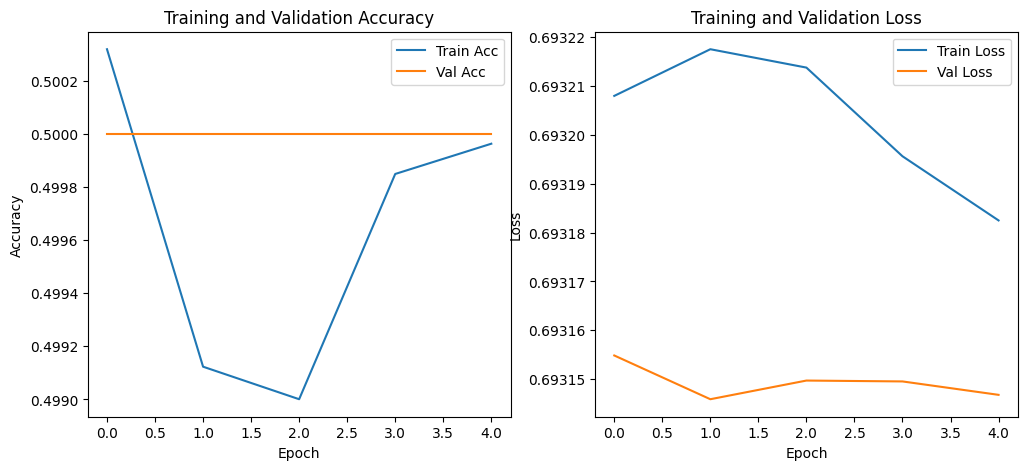

In [24]:
# --- Predict on test set ---
y_pred_prob = lstm_model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("LSTM Confusion Matrix")
plt.show()

# --- Classification Report ---
print("LSTM Classification Report:\n")
print(classification_report(y_test, y_pred))

# --- Plot training history (accuracy and loss) ---
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history_lstm.history['accuracy'], label='Train Acc')
plt.plot(history_lstm.history['val_accuracy'], label='Val Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### **GRU Model**

In [26]:
# Hyperparameters to tune
embedding_dim = 128    # size of word embeddings
gru_units = 64         # number of GRU units
dropout_rate = 0.3     # dropout applied after GRU
learning_rate = 0.0003 # optimizer learning rate
batch_size = 64        # training batch size
max_words = 10000      # vocabulary size
max_len = 100           # max sequence length

# Build GRU model
gru_model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    GRU(gru_units, dropout=dropout_rate, recurrent_dropout=dropout_rate),
    Dense(64, activation='relu'),
    Dropout(0.5),            # stronger dropout on dense layer
    Dense(1, activation='sigmoid')  # binary classification
])

# Compile with Adam optimizer and given learning rate
optimizer = Adam(learning_rate=learning_rate)
gru_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

gru_model.summary()

# Early stopping callback to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history_gru = gru_model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=10,
    batch_size=batch_size,
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 3266s 163ms/step - accuracy: 0.4999 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 3291s 165ms/step - accuracy: 0.4991 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 3302s 165ms/step - accuracy: 0.5002 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 3317s 166ms/step - accuracy: 0.5006 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 3322s 166ms/step - accuracy: 0.5012 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 3319s 166ms/step - accuracy: 0.4996 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 3267s 163ms/step - accuracy: 0.4994 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


10000/10000 ━━━━━━━━━━━━━━━━━━━━ 525s 52ms/step


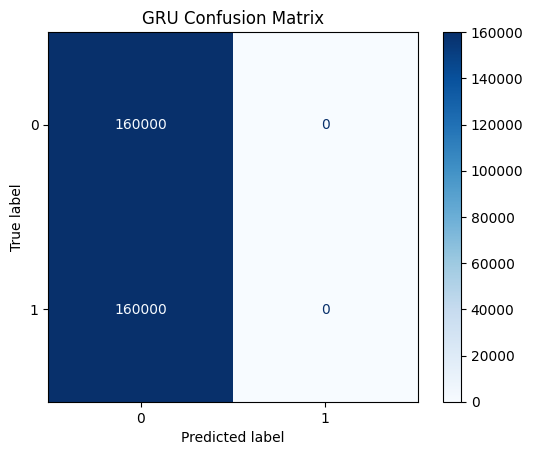

GRU Classification Report:

              precision    recall  f1-score   support

           0       0.50      1.00      0.67    160000
           1       0.00      0.00      0.00    160000

    accuracy                           0.50    320000
   macro avg       0.25      0.50      0.33    320000
weighted avg       0.25      0.50      0.33    320000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


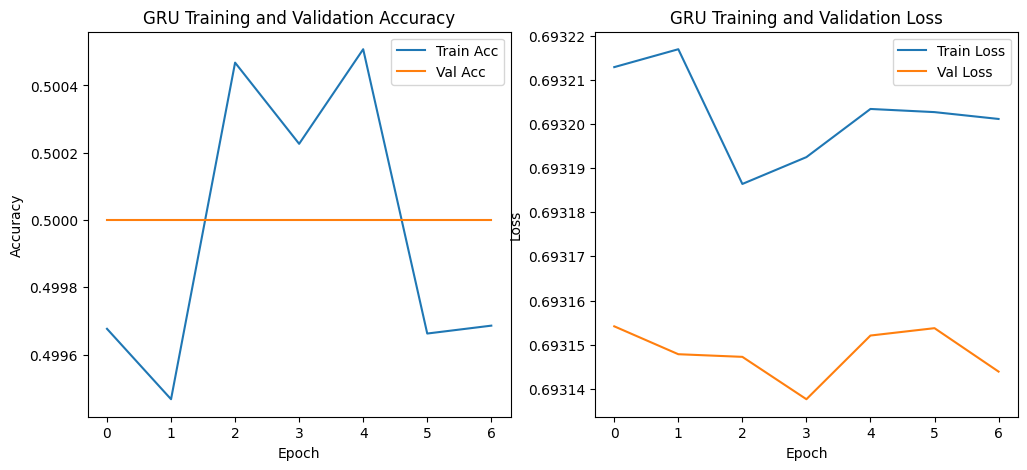

In [66]:
# --- Predict on test set ---
y_pred_prob_gru = gru_model.predict(X_test_pad)  # Get prediction probabilities
y_pred_gru = (y_pred_prob_gru > 0.5).astype(int).flatten()  # Convert to binary labels

# --- Confusion Matrix ---
cm_gru = confusion_matrix(y_test, y_pred_gru)  # Compute confusion matrix
disp_gru = ConfusionMatrixDisplay(confusion_matrix=cm_gru)
disp_gru.plot(cmap=plt.cm.Blues)  # Plot matrix with blue color map
plt.title("GRU Confusion Matrix")
plt.show()

# --- Classification Report ---
print("GRU Classification Report:\n")
print(classification_report(y_test, y_pred_gru))  # Precision, recall, f1-score

# --- Plot training history (accuracy and loss) ---
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_gru.history['accuracy'], label='Train Acc')
plt.plot(history_gru.history['val_accuracy'], label='Val Acc')
plt.title('GRU Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_gru.history['loss'], label='Train Loss')
plt.plot(history_gru.history['val_loss'], label='Val Loss')
plt.title('GRU Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## **Hyperparameter tuning**

## **LSTM**

In [67]:
# --- Fine-tuned hyperparameters ---
embedding_dim = 128         # Size of embedding vectors for each word
lstm_units = 96             # Number of LSTM units (hidden states)
dropout_rate = 0.3          # Dropout to reduce overfitting within LSTM
learning_rate = 0.001      # Small learning rate for smoother convergence
batch_size = 64             # Number of samples per gradient update
epochs = 10                 # Max epochs for training

# --- LSTM Model Architecture ---
lstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim),
    # Embedding layer turns integer sequences into dense vectors
    LSTM(lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate),
    # LSTM layer with dropout on inputs and recurrent connections
    Dense(64, activation='relu'),  # Fully connected layer with ReLU activation
    Dropout(0.5),                  # Dropout for regularization after dense layer
    Dense(1, activation='sigmoid') # Output layer for binary classification (0 or 1)
])

# --- Compile the model with Adam optimizer and binary cross-entropy loss ---
optimizer = Adam(learning_rate=learning_rate)
lstm_model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

# Print model summary to check architecture and parameter counts
lstm_model.summary()

# --- Callbacks ---
early_stop = EarlyStopping(
    monitor='val_loss',     # Watch validation loss
    patience=3,             # Stop if no improvement for 3 consecutive epochs
    restore_best_weights=True  # Restore best model weights after stopping
)

# --- Train the model ---
history_lstm = lstm_model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stop],  # Enable early stopping
    verbose=1                # Show training progress
)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 3301s 165ms/step - accuracy: 0.4993 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 3304s 165ms/step - accuracy: 0.4992 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 3311s 166ms/step - accuracy: 0.4994 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 3315s 166ms/step - accuracy: 0.4995 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


10000/10000 ━━━━━━━━━━━━━━━━━━━━ 532s 53ms/step


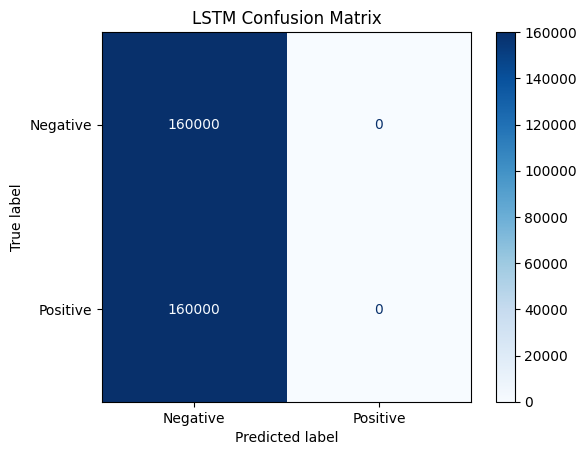

LSTM Classification Report:

              precision    recall  f1-score   support

           0       0.50      1.00      0.67    160000
           1       0.00      0.00      0.00    160000

    accuracy                           0.50    320000
   macro avg       0.25      0.50      0.33    320000
weighted avg       0.25      0.50      0.33    320000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


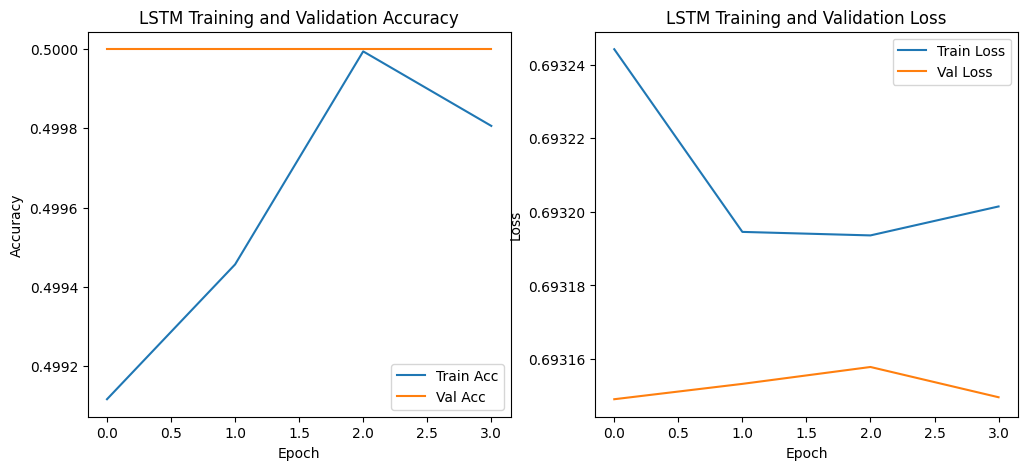

In [70]:
# --- Predict on test set ---
y_pred_prob_lstm = lstm_model.predict(X_test_pad)  # Prediction probabilities
y_pred_lstm = (y_pred_prob_lstm > 0.5).astype(int).flatten()  # Convert to binary labels

# --- Confusion Matrix ---
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
disp_lstm = ConfusionMatrixDisplay(confusion_matrix=cm_lstm, display_labels=['Negative', 'Positive'])
disp_lstm.plot(cmap=plt.cm.Blues)
plt.title("LSTM Confusion Matrix")
plt.show()

# --- Classification Report ---
print("LSTM Classification Report:\n")
print(classification_report(y_test, y_pred_lstm))

# --- Plot training history (accuracy and loss) ---
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'], label='Train Acc')
plt.plot(history_lstm.history['val_accuracy'], label='Val Acc')
plt.title('LSTM Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Val Loss')
plt.title('LSTM Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## **GRU**

In [20]:
# Hyperparameters to tune
embedding_dim = 128    # size of word embeddings
gru_units = 96         # number of GRU units
dropout_rate = 0.3     # dropout applied after GRU
learning_rate = 0.001 # optimizer learning rate
batch_size = 64        # training batch size
max_words = 10000      # vocabulary size
max_len = 100           # max sequence length

# Build GRU model
gru_model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    GRU(gru_units, dropout=dropout_rate, recurrent_dropout=dropout_rate),
    Dense(64, activation='relu'),
    Dropout(0.5),            # stronger dropout on dense layer
    Dense(1, activation='sigmoid')  # binary classification
])

# Compile with Adam optimizer and given learning rate
optimizer = Adam(learning_rate=learning_rate)
gru_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

gru_model.summary()

# Early stopping callback to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history_gru = gru_model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=10,
    batch_size=batch_size,
    callbacks=[early_stop]
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 4314s 215ms/step - accuracy: 0.5008 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 4305s 215ms/step - accuracy: 0.4993 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 4308s 215ms/step - accuracy: 0.4990 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/10
   89/20000 ━━━━━━━━━━━━━━━━━━━━ 1:05:33 198ms/step - accuracy: 0.4960 - loss: 0.6932

KeyboardInterrupt: 

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 284s 28ms/step


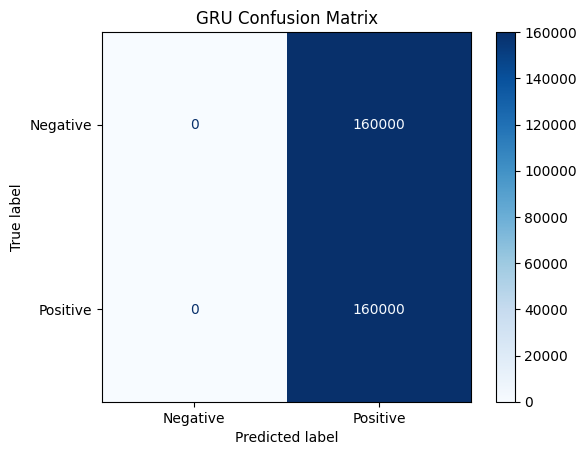

GRU Classification Report:

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00    160000
    Positive       0.50      1.00      0.67    160000

    accuracy                           0.50    320000
   macro avg       0.25      0.50      0.33    320000
weighted avg       0.25      0.50      0.33    320000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


NameError: name 'history_gru' is not defined

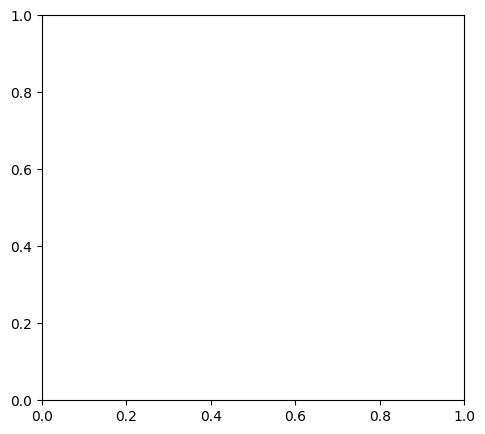

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# --- Predict on test set ---
y_pred_prob_gru = gru_model.predict(X_test_pad)  # Probabilities
y_pred_gru = (y_pred_prob_gru > 0.5).astype(int).flatten()  # Convert to 0 or 1

# --- Confusion Matrix ---
cm_gru = confusion_matrix(y_test, y_pred_gru, labels=[0, 1])
disp_gru = ConfusionMatrixDisplay(confusion_matrix=cm_gru,
                                  display_labels=['Negative', 'Positive'])
disp_gru.plot(cmap=plt.cm.Blues)
plt.title("GRU Confusion Matrix")
plt.show()

# --- Classification Report ---
print("GRU Classification Report:\n")
print(classification_report(y_test, y_pred_gru, target_names=['Negative', 'Positive']))

# --- Plot training history (Accuracy & Loss) ---
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_gru.history['accuracy'], label='Train Acc')
plt.plot(history_gru.history['val_accuracy'], label='Val Acc')
plt.title('GRU Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_gru.history['loss'], label='Train Loss')
plt.plot(history_gru.history['val_loss'], label='Val Loss')
plt.title('GRU Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
